<a href="https://colab.research.google.com/github/angelaportillo/AI_IB/blob/main/AF5_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5.- Artificial Neural Network: feedforward.
### Hour: N1  Team members:
*2028256 Zapata Portillo Angela Maris*

*2016872 Marian Roxana Martínez Serrato*

*2016052 Pablo Ezaú Zapata Cruz*

*2043428 David Aldebaran Cardona Padilla*

*2132042 Jennifer Morales Enciso*


In [25]:
# Import libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Load dataset (MNIST)
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [27]:
# Data preprocessing
# Values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

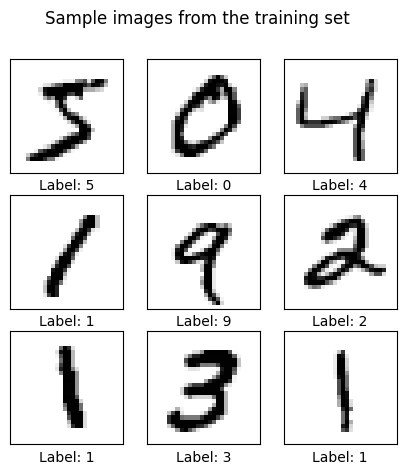

In [28]:
# Some sample images
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {train_labels[i]}")
plt.suptitle("Sample images from the training set")
plt.show()

In [29]:
# Feedforward Neural Network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 → 784 vector
    keras.layers.Dense(256, activation='relu'),  # 1st hidden layer with 256 neurons
    keras.layers.Dense(128, activation='relu'),  # 2nd hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

In [30]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8466 - loss: 0.5398 - val_accuracy: 0.9703 - val_loss: 0.1138
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9665 - loss: 0.1120 - val_accuracy: 0.9732 - val_loss: 0.0906
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9788 - loss: 0.0726 - val_accuracy: 0.9747 - val_loss: 0.0897
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9846 - loss: 0.0496 - val_accuracy: 0.9780 - val_loss: 0.0751
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9879 - loss: 0.0373 - val_accuracy: 0.9792 - val_loss: 0.0696
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9815 - val_loss: 0.0689
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9953 - loss: 0.0156 - val_accurac

In [32]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\n Test dataset accuracy: {test_acc * 100:.2f}%")

313/313 - 1s - 3ms/step - accuracy: 0.9742 - loss: 0.0946

 Test dataset accuracy: 97.42%


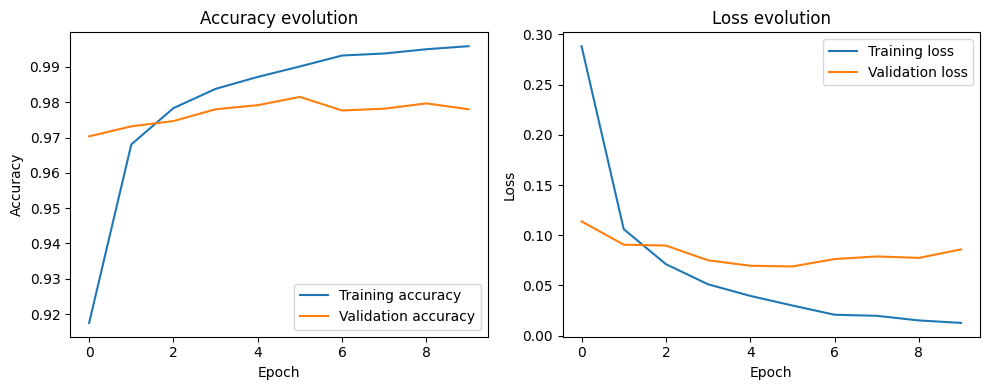

In [33]:
# Training history plots
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy evolution')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss evolution')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


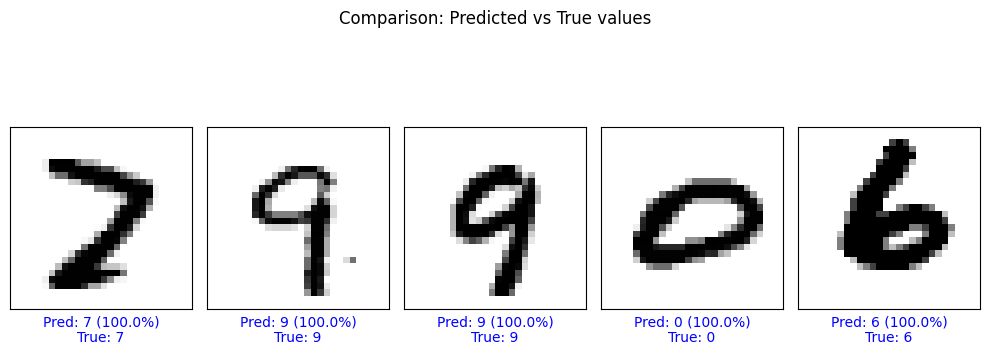

In [34]:
# Predictions on the test set
predictions = model.predict(test_images)

# Function to display an image and its prediction
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"Pred: {predicted_label} ({100*np.max(predictions_array):.1f}%)\nTrue: {true_label}", color=color)

# 5 random predictions
num_to_show = 5
indices = np.random.randint(0, len(test_images), num_to_show)

plt.figure(figsize=(10,4))
for i, idx in enumerate(indices):
    plt.subplot(1, num_to_show, i+1)
    plot_image(idx, predictions[idx], test_labels, test_images)
plt.suptitle("Comparison: Predicted vs True values")
plt.tight_layout()
plt.show()


In [35]:
# Numerical predictions and true values
print("\nPrediction examples:")
for i in indices:
    pred_label = np.argmax(predictions[i])
    print(f"Image {i}: Predicted = {pred_label}, True label = {test_labels[i]}")


Prediction examples:
Image 8316: Predicted = 7, True label = 7
Image 9397: Predicted = 9, True label = 9
Image 6394: Predicted = 9, True label = 9
Image 9038: Predicted = 0, True label = 0
Image 7753: Predicted = 6, True label = 6
